In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
#import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# fetch data 

housing_data = pd.read_csv('Datasets/house_price_subset.csv')

housing_data.head()

,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,GarageCars,SaleCondition,SalePrice
0,8450,7,5,1710,2,3,2,Normal,208500
1,9600,6,8,1262,2,3,2,Normal,181500
2,11250,7,5,1786,2,3,2,Normal,223500
3,9550,7,5,1717,1,3,3,Abnorml,140000
4,14260,8,5,2198,2,4,3,Normal,250000


In [3]:
# subset data to only include columns for Normal Sale Condition

len(housing_data)

subset_data = housing_data[housing_data['SaleCondition'] == 'Normal'].drop(columns = ['SaleCondition'])

subset_data.head()

len(subset_data)

1460

,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,GarageCars,SalePrice
0,8450,7,5,1710,2,3,2,208500
1,9600,6,8,1262,2,3,2,181500
2,11250,7,5,1786,2,3,2,223500
4,14260,8,5,2198,2,4,3,250000
5,14115,5,5,1362,1,1,2,143000


1198

In [4]:
subset_data.isna().sum()

LotArea         0
OverallQual     0
OverallCond     0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
GarageCars      0
SalePrice       0
dtype: int64

In [5]:
subset_data.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea', 'FullBath',
       'BedroomAbvGr', 'GarageCars', 'SalePrice'],
      dtype='object')

Text(0.5, 0, 'LotArea')

Text(0, 0.5, 'SalePrice')

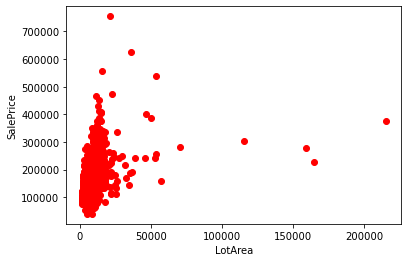

Text(0.5, 0, 'OverallQual')

Text(0, 0.5, 'SalePrice')

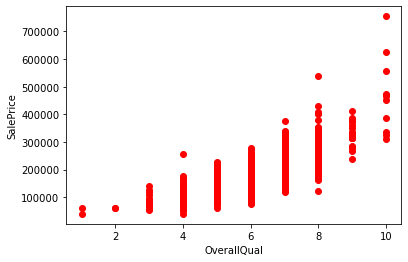

Text(0.5, 0, 'OverallCond')

Text(0, 0.5, 'SalePrice')

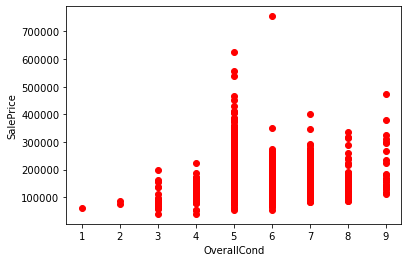

Text(0.5, 0, 'GrLivArea')

Text(0, 0.5, 'SalePrice')

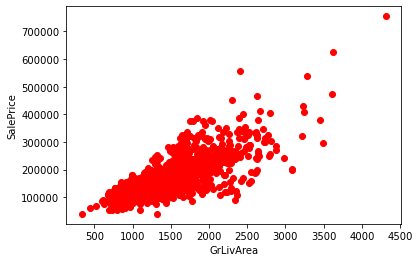

Text(0.5, 0, 'FullBath')

Text(0, 0.5, 'SalePrice')

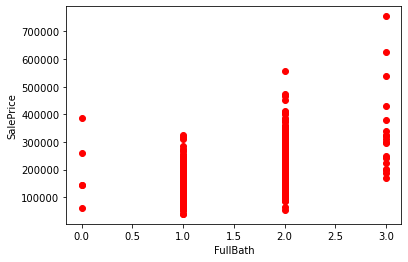

Text(0.5, 0, 'BedroomAbvGr')

Text(0, 0.5, 'SalePrice')

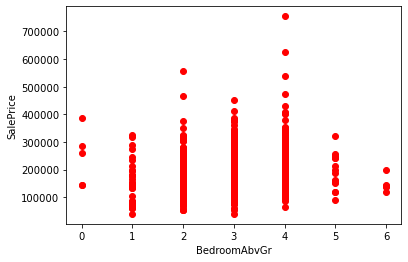

Text(0.5, 0, 'GarageCars')

Text(0, 0.5, 'SalePrice')

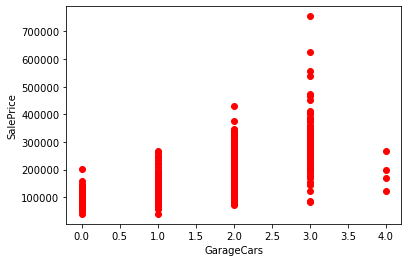

In [6]:
for col in subset_data.drop(columns = ['SalePrice']).columns:
    plt.scatter(subset_data[col], subset_data['SalePrice'], color = 'red', marker = 'o')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

In [7]:
# X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['SalePrice']), subset_data['SalePrice'], test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['SalePrice']), subset_data['SalePrice'], test_size=0.25, random_state=35)
# Pick a random_state as below and keep using the same number (example 35) to repeat the same test and train data
# X_train, X_test, y_train, y_test = train_test_split(subset_data['bmi'], subset_data['charges'], test_size=0.25, random_state=35)
X_train
X_test
y_train
y_test

,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,GarageCars
574,10500,5,7,1109,1,3,1
662,13560,6,3,1392,1,2,2
97,10921,4,5,960,1,3,1
191,7472,7,9,1479,1,4,2
769,53504,8,5,3279,3,4,3
...,...,...,...,...,...,...,...
911,9286,5,7,1268,1,3,1
1176,6951,5,5,923,1,3,1
1231,7728,5,6,1190,1,3,2
1295,8400,5,5,1052,1,3,1


,LotArea,OverallQual,OverallCond,GrLivArea,FullBath,BedroomAbvGr,GarageCars
1350,11643,5,5,2634,2,6,4
1438,7407,6,7,1236,1,2,2
975,2651,7,5,1382,2,3,2
163,5500,4,6,882,1,1,0
1225,10482,6,8,1138,1,3,1
...,...,...,...,...,...,...,...
132,7388,5,6,1327,1,3,2
582,11841,6,5,816,1,3,0
1390,9100,7,5,1525,2,3,2
94,9337,6,5,1786,2,3,2


574     139000
662     110000
97       94750
191     184000
769     538000
         ...  
911     143500
1176    119500
1231    132500
1295    138500
1168    235000
Name: SalePrice, Length: 898, dtype: int64

1350    200000
1438    149700
975     165000
163     103200
1225    145000
         ...  
132     150750
582     118500
1390    235000
94      204750
777     142500
Name: SalePrice, Length: 300, dtype: int64

In [8]:
X_train.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea', 'FullBath',
       'BedroomAbvGr', 'GarageCars'],
      dtype='object')

In [9]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "log2", max_depth = 5)

rf = rf.fit(X_train, y_train) 


In [10]:
rf.feature_importances_

array([0.10002636, 0.33907591, 0.01429174, 0.24698987, 0.13001613,
       0.0087564 , 0.16084359])

In [11]:
test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_SalePrice'])
test_output.head()

,pred_SalePrice
1350,"229,989.04"
1438,"142,003.37"
975,"185,219.66"
163,"98,409.02"
1225,"139,720.79"


In [12]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_SalePrice'] - test_output['SalePrice']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)

,pred_SalePrice,SalePrice
1350,"229,989.04",200000
1438,"142,003.37",149700
975,"185,219.66",165000
163,"98,409.02",103200
1225,"139,720.79",145000


Mean absolute error is 
22071.445767106332


In [13]:
abs(test_output['pred_SalePrice'] - test_output['SalePrice']).mean()/test_output['SalePrice'].mean()


0.13081656710326625

#### Visualize data

In [14]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [15]:
if False: 
    cols = X_train.columns
    for col in cols:
        plot_data = []
        plot_data.append(go.Scatter(x= X_train[col], y= y_train, name = 'Train data actual', mode = 'markers'))
        plot_data.append(go.Scatter(x= X_train[col], y= rf.predict(X_train), name = 'Train data predicted', mode = 'markers'))
        layout = go.Layout(xaxis = dict(title=col), yaxis = dict(title= 'SalePrice'), 
                           title = 'Plot of predicted and actual')
        fig = go.Figure(data= plot_data, layout=layout)
        plotly.offline.iplot(fig)

        plot_data = []
        plot_data.append(go.Scatter(x= X_test[col], y= y_test, name = 'Test data actual', mode = 'markers'))
        plot_data.append(go.Scatter(x= X_test[col], y= rf.predict(X_test), name = 'Test data predicted', mode = 'markers'))

        layout = go.Layout(xaxis = dict(title=col), yaxis = dict(title= 'SalePrice'), 
                           title = 'Plot of predicted and actual')
        fig = go.Figure(data= plot_data, layout=layout)
        plotly.offline.iplot(fig)


In [16]:
# Notes
# Linear model, no regularization
# test score 0.7255, pct error error 30.39%
# Nonlinear model with log, sq and cubes, no regularization
# test score 0.813, pct error error 28.23%
# Linear model, Lasso alpha = 0.1
# test score 0.7255, pct error error 30.39%
# Linear model, Lasso alpha = 10.0
# test score 0.7256, pct error error 30.39%
# Linear model, Ridge alpha = 0.1
# test score 0.7255, pct error error 30.39%
# Linear model, Ridge alpha = 10.0
# test score 0.7267, pct error error 30.31%
# NonLinear model, Lasso alpha = 0.1
# test score 0.813, pct error error 28.23% (user max_iter = 100000, yes 10 times more)
# NonLinear model, Lasso alpha = 10.0
# test score 0.812, pct error error 28.13% (sauser max_iter = 10000, only one feature drop)
# NonLinear model, Ridge alpha = 0.1
# test score 0.813, pct error error 28.15%
# NonLinear model, Ridge alpha = 10.0
# test score 0.8, pct error error 28.79%
# NonLinear model, Lasso alpha = 20.0
# test score 0.811, pct error error 28.08%